# Exploratory: Augmenting the model with a menagerie of speaker preferences
Natalia Vélez, March 2022

In [9]:
%matplotlib inline

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.ndimage as ndimage

sys.path.append('..')
from utils import read_json, gsearch

sns.set_style('white')
sns.set_context('talk')

Load teaching problems:

In [2]:
problems = read_json('inputs/problems.json')

(Debug) Test problem

In [3]:
test_idx = 0
test = problems[0]

## Preference 1: Edge

In [4]:
def filter_func(values):
    '''
    Helper: Returns sum of # neighbors
    '''
    return values.sum()

def edge_pref(prob):
    # kernel used to count neighbors
    footprint = np.array([[1,1,1],
                          [1,0,1],
                          [1,1,1]])
    
    # count # neighbors
    prob_arr = np.array(list(prob.values()))
    n_neighbors = np.array([ndimage.generic_filter(h, filter_func, footprint=footprint) 
                            for h in prob.values()])

    # make array of weights inv. related to number of neighbors
    weight_arr = np.multiply(prob_arr, 9-n_neighbors)
    weight_sums = weight_arr.sum(axis=(1,2))
    edge_weights = np.divide(weight_arr, weight_sums[:, np.newaxis, np.newaxis])
    
    # save as dataframe
    edge_df = teach
    return edge_weights

Let's test it out!

In [5]:
edge_pref(test)

array([[[0.        , 0.        , 0.05      , 0.05      , 0.        ,
         0.        ],
        [0.        , 0.06666667, 0.03333333, 0.03333333, 0.06666667,
         0.        ],
        [0.05      , 0.03333333, 0.01666667, 0.01666667, 0.03333333,
         0.05      ],
        [0.05      , 0.03333333, 0.01666667, 0.01666667, 0.03333333,
         0.05      ],
        [0.        , 0.06666667, 0.03333333, 0.03333333, 0.06666667,
         0.        ],
        [0.        , 0.        , 0.05      , 0.05      , 0.        ,
         0.        ]],

       [[0.02702703, 0.02702703, 0.10810811, 0.        , 0.        ,
         0.        ],
        [0.02702703, 0.02702703, 0.08108108, 0.        , 0.        ,
         0.        ],
        [0.10810811, 0.08108108, 0.08108108, 0.13513514, 0.        ,
         0.        ],
        [0.        , 0.        , 0.13513514, 0.16216216, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        

In [6]:
teach.hypotheses_dataframe(edge_pref(test))

hypothesis,A,B,C,D
idx,,,,
0,0.000000,0.027027,0.000000,0.000
1,0.000000,0.027027,0.000000,0.000
2,0.050000,0.108108,0.000000,0.000
3,0.050000,0.000000,0.108108,0.000
4,0.000000,0.000000,0.027027,0.000
5,0.000000,0.000000,0.027027,0.000
6,0.000000,0.027027,0.000000,0.000
7,0.066667,0.027027,0.000000,0.000
8,0.033333,0.081081,0.000000,0.000


## Preference 2: Density

In [28]:
def density_pref(prob):
    # Calculate density (# of problems that share a point)
    prob_arr = np.array(list(prob.values()))
    density = np.sum(prob_arr, axis=0)/4

    # Convert density back into array of utterance weights
    weight_arr = density*prob_arr
    weight_sums = weight_arr.sum(axis=(1,2))
    density_weights = np.divide(weight_arr, weight_sums[:, np.newaxis, np.newaxis])
    
    return density_weights

Let's test it out!

In [29]:
density_pref(test)

array([[[0.        , 0.        , 0.03571429, 0.03571429, 0.        ,
         0.        ],
        [0.        , 0.03571429, 0.03571429, 0.03571429, 0.03571429,
         0.        ],
        [0.03571429, 0.03571429, 0.07142857, 0.07142857, 0.03571429,
         0.03571429],
        [0.03571429, 0.03571429, 0.07142857, 0.07142857, 0.03571429,
         0.03571429],
        [0.        , 0.03571429, 0.03571429, 0.03571429, 0.03571429,
         0.        ],
        [0.        , 0.        , 0.03571429, 0.03571429, 0.        ,
         0.        ]],

       [[0.03448276, 0.03448276, 0.06896552, 0.        , 0.        ,
         0.        ],
        [0.03448276, 0.06896552, 0.06896552, 0.        , 0.        ,
         0.        ],
        [0.06896552, 0.06896552, 0.13793103, 0.13793103, 0.        ,
         0.        ],
        [0.        , 0.        , 0.13793103, 0.13793103, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        

## Preference 3: Typewriter

In [30]:
def typewriter_pref(prob):
    # Weight points by order, starting from top-left corner
    typewriter = np.reshape(36 - np.arange(36), (6,6))

     # Convert weights back into speaker preference
    weight_arr = np.array([np.multiply(h, typewriter) for h in prob.values()])
    weight_sums = weight_arr.sum(axis=(1,2))
    typewriter_weights = np.divide(weight_arr, weight_sums[:, np.newaxis, np.newaxis])
    
    return typewriter_weights

In [31]:
typewriter_pref(test)

array([[[0.        , 0.        , 0.07657658, 0.07432432, 0.        ,
         0.        ],
        [0.        , 0.06531532, 0.06306306, 0.06081081, 0.05855856,
         0.        ],
        [0.05405405, 0.0518018 , 0.04954955, 0.0472973 , 0.04504505,
         0.04279279],
        [0.04054054, 0.03828829, 0.03603604, 0.03378378, 0.03153153,
         0.02927928],
        [0.        , 0.02477477, 0.02252252, 0.02027027, 0.01801802,
         0.        ],
        [0.        , 0.        , 0.00900901, 0.00675676, 0.        ,
         0.        ]],

       [[0.11501597, 0.11182109, 0.1086262 , 0.        , 0.        ,
         0.        ],
        [0.09584665, 0.09265176, 0.08945687, 0.        , 0.        ,
         0.        ],
        [0.07667732, 0.07348243, 0.07028754, 0.06709265, 0.        ,
         0.        ],
        [0.        , 0.        , 0.05111821, 0.04792332, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        

## Plot speaker preferences

In [36]:
def plot_preferences(idx):
    prob = problems[idx]

    # start figure
    fig,axes = plt.subplots(4,4, figsize=(12,12))

    # row 1: plot problem
    prob_arr = np.array(list(prob.values()))
    labels=['A', 'B', 'C', 'D']
    for p in range(4):
        # Heatmap
        sns.heatmap(prob_arr[p], square=True, cbar=False, cmap='Greys', lw=1, linecolor='#aaa', ax=axes[0,p])

        # Name y-axis label
        if p == 0:
            ylab = 'Problem'
        else:
            ylab = ''

        # Format panel
        axes[0,p].set(xticklabels=[], yticklabels=[], ylabel=ylab, title=labels[p])

    # rows 2-4: edge preference
    edge_arr = edge_pref(prob) # calculate each pref
    density_arr = density_pref(prob)
    typewriter_arr = typewriter_pref(prob)

    all_prefs = [edge_arr, density_arr, typewriter_arr] # put it all together
    pref_labels = ['Edge', 'Density', 'Typewriter']

    for row in range(3): # plot each pref in a separate row
        for p in range(4):
            # Heatmap
            sns.heatmap(all_prefs[row][p], square=True, cbar=False, cmap='viridis', ax=axes[row+1,p])

            # Name y-axis label
            if p == 0:
                ylab = pref_labels[row]
            else:
                ylab = ''

            # Format panel
            axes[row+1,p].set(xticklabels=[], yticklabels=[], ylabel=ylab)

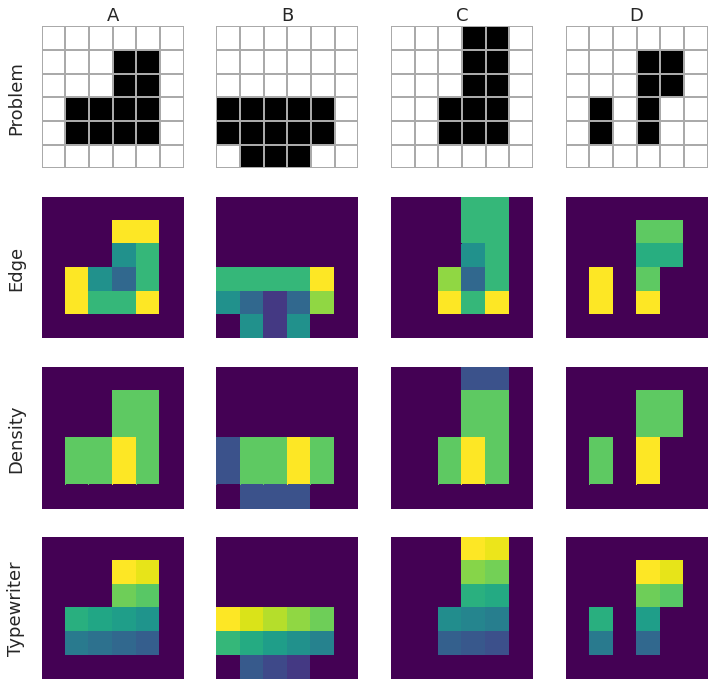

In [42]:
plot_preferences(28)